In [1]:
import numpy as np
import sympy
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.qasm2 import dumps

from itertools import combinations
from qiskit import Aer, QuantumCircuit
from qiskit.quantum_info import Operator
from qiskit.circuit import Parameter,ParameterVector
from qiskit.utils import algorithm_globals


In [2]:
n_qubits = 4
n_repeats = 2
qubits = QuantumRegister(n_qubits)

In [7]:
def rotate_layer(qubits,param_prefix):
    qc = QuantumCircuit(qubits)
    params = ParameterVector(param_prefix, length=n_qubits*3)
    for i in range(n_qubits):
        qc.rz(params[i], qubits[i])
        qc.rx(params[i+n_qubits], qubits[i])
        qc.rz(params[i+2*n_qubits], qubits[i])

    return qc

In [9]:
def entangle_layer(qubits,param_prefix):
    qc = QuantumCircuit(qubits)
    
    n_comb = int(n_qubits*(n_qubits-1)/2)
    params = ParameterVector(param_prefix, n_comb)
    
    comb = combinations(qubits, 2)
    index=0
    for i in comb:
        qc.rxx(params[index],i[0], i[1])
        index += 1

    return qc

In [10]:
def whole_circuit(qubits,repeats):
    qc = QuantumCircuit(qubits)
    for i in range(repeats):
        qc.compose(rotate_layer(qubits,"r"+str(i)), qubits, inplace=True)
        qc.compose(entangle_layer(qubits,"e"+str(i)), qubits, inplace=True)
    return qc
    

/opt/.qbraid/environments/qbraid_000000/pyenv/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


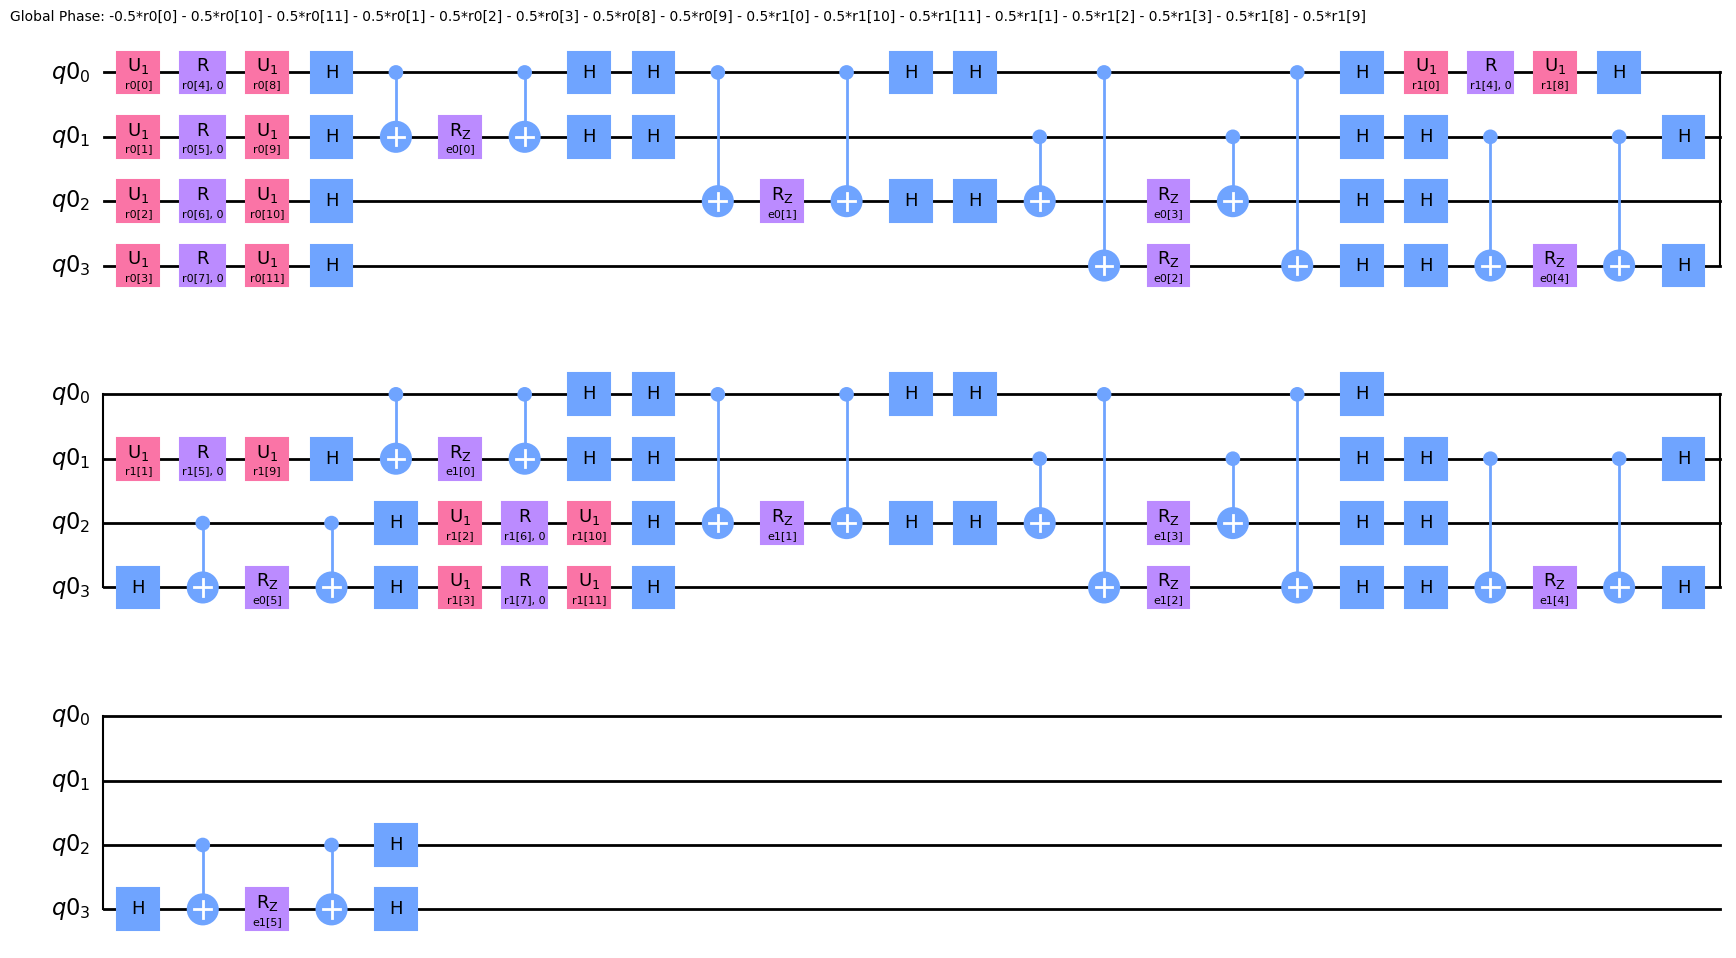

In [11]:
circ = whole_circuit(qubits,n_repeats)
circ.decompose().draw('mpl')